- MySQL에 적재된 데이터를 불러와 데이터분석 및 EDA 수행

In [7]:
import mysql.connector
import pandas as pd

# 학생들 OMR 정보 가져오기
# MySQL 연결 정보
host = "127.0.0.1"  # MySQL 서버 주소
user = "root"  # MySQL 사용자명
password = "9703"  # MySQL 비밀번호
database = "megastudy"  # 사용할 데이터베이스 이름

try:
    # MySQL 연결
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()

    # SQL 쿼리 실행
    query = "SELECT * FROM suneung_results;"
    cursor.execute(query)


    # 컬럼명 가져오기
    column_names = [i[0] for i in cursor.description]

    # 데이터프레임으로 변환
    suneung_df = pd.DataFrame(cursor.fetchall(), columns=column_names)

    print("데이터프레임 변환 완료!")
    print(suneung_df.head())  # 데이터 확인

except mysql.connector.Error as err:
    print(f"MySQL 연결 실패: {err}")

finally:
    # 연결 종료
    if 'cursor' in locals():
        cursor.close()
    if 'conn' in locals():
        conn.close()

데이터프레임 변환 완료!
       수험번호 선택과목  문제번호  대분류      중분류          소분류  학생이 쓴 답  정답  배점
0  20220001  미적분     1  수학Ⅰ   지수와 로그    로그 함수의 성질        4   4   2
1  20220001  미적분     2  수학Ⅱ   함수의 극한   함수의 극한값 계산        1   1   2
2  20220001  미적분     3  수학Ⅰ     삼각함수     삼각함수의 성질        2   2   2
3  20220001  미적분     4  수학Ⅱ  함수의 연속성  연속의 개념 및 조건        1   1   3
4  20220001  미적분     5  수학Ⅰ       수열    등차수열의 일반항        3   3   3


In [8]:
# 학생정보 테이블 가져오기
try:
    # MySQL 연결
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password,
        database=database
    )
    cursor = conn.cursor()

    # SQL 쿼리 실행
    query = "SELECT * FROM student_info;"
    cursor.execute(query)

    # 컬럼명 가져오기
    column_names = [i[0] for i in cursor.description]

    # 데이터프레임으로 변환
    student_df = pd.DataFrame(cursor.fetchall(), columns=column_names)

    print("데이터프레임 변환 완료!")
    print(student_df.head())  # 데이터 확인

except mysql.connector.Error as err:
    print(f"MySQL 연결 실패: {err}")

finally:
    # 연결 종료
    if 'cursor' in locals():
        cursor.close()
    if 'conn' in locals():
        conn.close()

데이터프레임 변환 완료!
       수험번호   이름
0  20220001  강도윤
1  20220002  강도현
2  20220003  강민수
3  20220004  강민지
4  20220005  강서연


In [9]:
# 학생들의 점수를 데이터 프레임에 저장
import numpy as np

# 수험번호별 점수 계산
score_df = (
    suneung_df.assign(점수=np.where(suneung_df["학생이 쓴 답"] == suneung_df["정답"], suneung_df["배점"], 0))
    .groupby("수험번호", as_index=False)["점수"].sum()
)

# 결과 출력
print(score_df.head())

       수험번호  점수
0  20220001  75
1  20220002  78
2  20220003  72
3  20220004  74
4  20220005  62


In [10]:
# 데이터프레임 병합 (수험번호 기준)
student_score_df = pd.merge(student_df, score_df, on="수험번호")

# 결과 출력
print(student_score_df.head())

       수험번호   이름  점수
0  20220001  강도윤  75
1  20220002  강도현  78
2  20220003  강민수  72
3  20220004  강민지  74
4  20220005  강서연  62


In [11]:
student_score_df.head()

,수험번호,이름,점수
0,20220001,강도윤,75
1,20220002,강도현,78
2,20220003,강민수,72
3,20220004,강민지,74
4,20220005,강서연,62


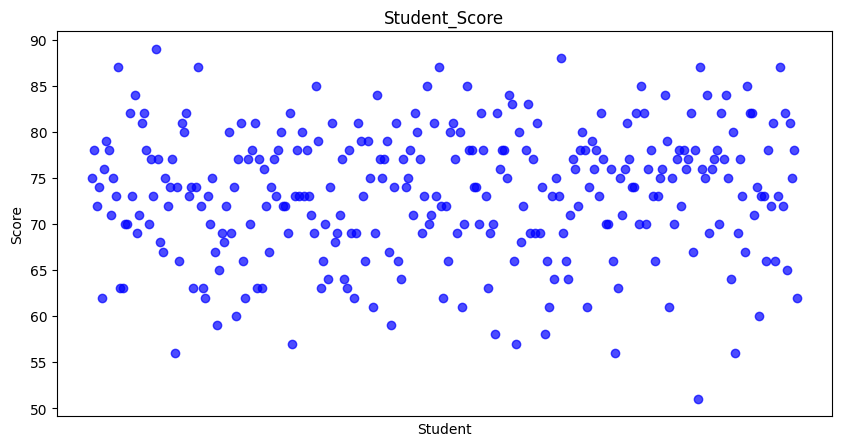

In [12]:
import warnings
import matplotlib.pyplot as plt

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 산점도 그리기 (x축: 인덱스, y축: 점수)
plt.scatter(student_score_df.index, student_score_df["점수"], color="blue", alpha=0.7)

# 축 레이블 설정
plt.xlabel("Student")
plt.ylabel("Score")
plt.title("Student_Score")

# 눈금 제거 (x축 레이블을 복잡하지 않게 하기 위해)
plt.xticks([])

# 그래프 표시
plt.show()

In [13]:
# max_min확인
print(max(student_score_df['점수']))
print(min(student_score_df['점수']))

89
51


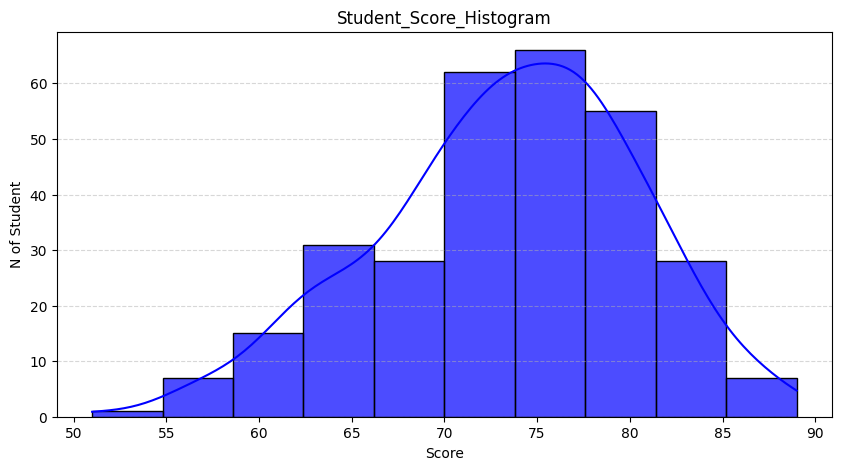

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 히스토그램 그리기 (bins=10: 점수를 10구간으로 나눔)
sns.histplot(student_score_df["점수"], bins=10, kde=True, color="blue", alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title("Student_Score_Histogram")
plt.xlabel("Score")
plt.ylabel("N of Student")

# y축 그리드 추가
plt.grid(axis="y", linestyle="--", alpha=0.5)

# 그래프 출력
plt.show()

In [15]:
new_suneung_df = suneung_df[['수험번호', '선택과목']]

# 중복 제거 (첫 번째 값만 유지)
choice_suneung_df = new_suneung_df.drop_duplicates(subset=['수험번호'])

# 결과 출력
print(choice_suneung_df)

          수험번호    선택과목
0     20220001     미적분
30    20220002     미적분
60    20220003     미적분
90    20220004     미적분
120   20220005     미적분
...        ...     ...
8850  20220296  기하와 벡터
8880  20220297  기하와 벡터
8910  20220298  기하와 벡터
8940  20220299  기하와 벡터
8970  20220300  기하와 벡터

[300 rows x 2 columns]


In [16]:
# 인덱스 reset
choice_suneung_df = choice_suneung_df.reset_index(drop=True)

print(choice_suneung_df)

         수험번호    선택과목
0    20220001     미적분
1    20220002     미적분
2    20220003     미적분
3    20220004     미적분
4    20220005     미적분
..        ...     ...
295  20220296  기하와 벡터
296  20220297  기하와 벡터
297  20220298  기하와 벡터
298  20220299  기하와 벡터
299  20220300  기하와 벡터

[300 rows x 2 columns]


In [17]:
student_seg_score_df = pd.merge(student_score_df, choice_suneung_df, on="수험번호")
print(student_seg_score_df.head())

       수험번호   이름  점수 선택과목
0  20220001  강도윤  75  미적분
1  20220002  강도현  78  미적분
2  20220003  강민수  72  미적분
3  20220004  강민지  74  미적분
4  20220005  강서연  62  미적분


In [18]:
student_seg_score_df.head()

,수험번호,이름,점수,선택과목
0,20220001,강도윤,75,미적분
1,20220002,강도현,78,미적분
2,20220003,강민수,72,미적분
3,20220004,강민지,74,미적분
4,20220005,강서연,62,미적분


In [19]:
student_seg_score_df = student_seg_score_df[['수험번호', '이름', '선택과목', '점수']]
print(student_seg_score_df.head())

       수험번호   이름 선택과목  점수
0  20220001  강도윤  미적분  75
1  20220002  강도현  미적분  78
2  20220003  강민수  미적분  72
3  20220004  강민지  미적분  74
4  20220005  강서연  미적분  62


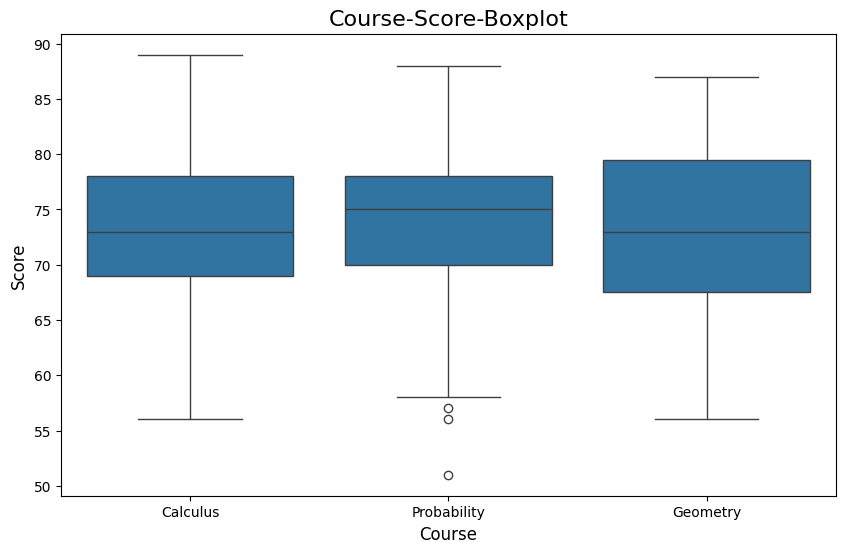

In [20]:
# 선택과목을 영어로 변경
student_seg_score_df['선택과목'] = student_seg_score_df['선택과목'].replace({
    '미적분': 'Calculus',
    '기하와 벡터': 'Geometry',
    '확률과 통계': 'Probability'
})

# 선택과목 그룹별 박스플롯 그려서 점수 분포 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='선택과목', y='점수', data=student_seg_score_df)

# 제목과 레이블 설정
plt.title('Course-Score-Boxplot', fontsize=16)
plt.xlabel('Course', fontsize=12)
plt.ylabel('Score', fontsize=12)

# 플롯 출력
plt.show()

In [ ]:
# 1등급컷과 2등급컷 계산
def grade_cutoff(group_df):
    # 점수 순으로 내림차순 정렬
    group_df_sorted = group_df.sort_values(by='점수', ascending=False)

    # 4%에 해당하는 인덱스 (1등급컷)
    first_grade_index = int(len(group_df_sorted) * 0.04)
    # 11%에 해당하는 인덱스 (2등급컷)
    second_grade_index = int(len(group_df_sorted) * 0.11)

    # 1등급컷: 상위 4%의 학생이 가진 점수
    first_grade_cutoff = group_df_sorted.iloc[first_grade_index - 1]['점수'] if first_grade_index > 0 else group_df_sorted.iloc[0]['점수']
    # 2등급컷: 상위 11%의 학생이 가진 점수
    second_grade_cutoff = group_df_sorted.iloc[second_grade_index - 1]['점수'] if second_grade_index > 0 else group_df_sorted.iloc[0]['점수']

    return pd.Series({
        '1등급컷': first_grade_cutoff,
        '2등급컷': second_grade_cutoff
    })

# 각 선택과목별로 그룹화하여 1등급컷과 2등급컷 계산
grade_cutoffs = student_seg_score_df.groupby('선택과목').apply(grade_cutoff)



In [30]:
grade_cutoffs

,1등급컷,2등급컷
선택과목,,
Calculus,85,81
Geometry,87,82
Probability,85,82


In [22]:
# 선택과목별로 가장 높은 점수와 낮은 점수 계산
def score_extremes(group_df):
    highest_score = group_df.loc[group_df['점수'].idxmax()]
    lowest_score = group_df.loc[group_df['점수'].idxmin()]
    
    return pd.Series({
        '가장 높은 점수': highest_score['점수'],
        '가장 낮은 점수': lowest_score['점수'],
        '가장 높은 점수 받은 사람': highest_score['수험번호'],
        '가장 낮은 점수 받은 사람': lowest_score['수험번호']
    })

# 각 선택과목별로 그룹화하여 최고/최저 점수 및 학생 정보 계산
extreme_scores = student_seg_score_df.groupby('선택과목').apply(score_extremes)

# 결과 출력
print(extreme_scores)

             가장 높은 점수  가장 낮은 점수  가장 높은 점수 받은 사람  가장 낮은 점수 받은 사람
선택과목                                                           
Calculus           89        56        20220028        20220036
Geometry           87        56        20220293        20220274
Probability        88        51        20220200        20220258


In [23]:
suneung_df.head()

,수험번호,선택과목,문제번호,대분류,중분류,소분류,학생이 쓴 답,정답,배점
0,20220001,미적분,1,수학Ⅰ,지수와 로그,로그 함수의 성질,4,4,2
1,20220001,미적분,2,수학Ⅱ,함수의 극한,함수의 극한값 계산,1,1,2
2,20220001,미적분,3,수학Ⅰ,삼각함수,삼각함수의 성질,2,2,2
3,20220001,미적분,4,수학Ⅱ,함수의 연속성,연속의 개념 및 조건,1,1,3
4,20220001,미적분,5,수학Ⅰ,수열,등차수열의 일반항,3,3,3


In [32]:
# 1번부터 22번 문제만 필터링
common_filtered_df = suneung_df[suneung_df['문제번호'].between(1, 22)].copy()

# 정답 여부 계산 (학생이 쓴 답 == 정답인 경우 True, 아니면 False)
common_filtered_df['정답여부'] = (common_filtered_df['학생이 쓴 답'] == common_filtered_df['정답']).astype(int)

# 문제번호별 정답률 계산
accuracy_df = (
    common_filtered_df.groupby('문제번호')['정답여부']
    .agg(정답자수='sum', 총응시자수='count')
    .assign(정답률=lambda x: x['정답자수'] / x['총응시자수'])
    .reset_index()
)

# 정답률이 가장 낮은 Top 1, Top 2 문제 찾기
lowest_accuracy = accuracy_df.nsmallest(2, '정답률')


# 결과 출력
top1 = lowest_accuracy.iloc[0]
top2 = lowest_accuracy.iloc[1]


print(f"🔹 공통과목 정답률이 낮은 문제:")
print(f"✅ Top 1: 문제번호 {int(top1['문제번호'])}, 정답률 {top1['정답률']:.2%}")
print(f"✅ Top 2: 문제번호 {int(top2['문제번호'])}, 정답률 {top2['정답률']:.2%}")

🔹 공통과목 정답률이 낮은 문제:
✅ Top 1: 문제번호 21, 정답률 67.33%
✅ Top 2: 문제번호 22, 정답률 70.67%


In [25]:
# 23번~30번 문제만 필터링
option_filtered_df = suneung_df[suneung_df['문제번호'].between(23, 30)].copy()

# 정답 여부 계산 (학생이 쓴 답 == 정답인 경우 True, 아니면 False)
option_filtered_df['정답여부'] = (option_filtered_df['학생이 쓴 답'] == option_filtered_df['정답']).astype(int)

# 선택과목별 & 문제번호별 정답률 계산
accuracy_df = (
    option_filtered_df.groupby(['선택과목', '문제번호'])['정답여부']
    .agg(정답자수='sum', 총응시자수='count')
    .assign(정답률=lambda x: x['정답자수'] / x['총응시자수'])
    .reset_index()
)

# 선택과목별 정답률이 가장 낮은 문제 Top 1, Top 2 찾기
lowest_accuracy = (
    accuracy_df.sort_values(['선택과목', '정답률'])
    .groupby('선택과목')
    .head(2)  # 각 선택과목별로 정답률이 낮은 상위 2개 문제 추출
)

# 결과 출력
print(f"📌 선택과목별 정답률이 가장 낮은 문제:")

for subject, sub_df in lowest_accuracy.groupby('선택과목'):
    print(f"\n🔹 선택과목: {subject}")
    for idx, row in sub_df.iterrows():
        print(f"✅ 문제번호 {row['문제번호']}, 정답률 {row['정답률']:.2%}")

📌 선택과목별 정답률이 가장 낮은 문제:

🔹 선택과목: 기하와 벡터
✅ 문제번호 29, 정답률 0.00%
✅ 문제번호 30, 정답률 3.33%

🔹 선택과목: 미적분
✅ 문제번호 29, 정답률 6.00%
✅ 문제번호 30, 정답률 8.00%

🔹 선택과목: 확률과 통계
✅ 문제번호 29, 정답률 4.17%
✅ 문제번호 30, 정답률 11.67%


In [26]:
geo_q29_df = suneung_df[(suneung_df['선택과목'] == '기하와 벡터') & (suneung_df['문제번호'] == 29)]

# 결과 확인 (상위 5개 출력)
geo_q29_df

# 정말 문제를 맞힌사람이 없는지 확인

,수험번호,선택과목,문제번호,대분류,중분류,소분류,학생이 쓴 답,정답,배점
8128,20220271,기하와 벡터,29,미적분,미분법,역함수의 미분,883,127,4
8158,20220272,기하와 벡터,29,미적분,미분법,역함수의 미분,282,127,4
8188,20220273,기하와 벡터,29,미적분,미분법,역함수의 미분,529,127,4
8218,20220274,기하와 벡터,29,미적분,미분법,역함수의 미분,243,127,4
8248,20220275,기하와 벡터,29,미적분,미분법,역함수의 미분,809,127,4
8278,20220276,기하와 벡터,29,미적분,미분법,역함수의 미분,693,127,4
8308,20220277,기하와 벡터,29,미적분,미분법,역함수의 미분,820,127,4
8338,20220278,기하와 벡터,29,미적분,미분법,역함수의 미분,491,127,4
8368,20220279,기하와 벡터,29,미적분,미분법,역함수의 미분,617,127,4
8398,20220280,기하와 벡터,29,미적분,미분법,역함수의 미분,463,127,4


In [27]:
geo_q30_df = suneung_df[(suneung_df['선택과목'] == '기하와 벡터') & (suneung_df['문제번호'] == 30)]

# 결과 확인 (상위 5개 출력)
geo_q30_df

# 1명만 문제를 맞췄는지 확인

,수험번호,선택과목,문제번호,대분류,중분류,소분류,학생이 쓴 답,정답,배점
8129,20220271,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,976,17,4
8159,20220272,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,955,17,4
8189,20220273,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,112,17,4
8219,20220274,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,80,17,4
8249,20220275,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,666,17,4
8279,20220276,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,419,17,4
8309,20220277,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,485,17,4
8339,20220278,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,936,17,4
8369,20220279,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,729,17,4
8399,20220280,기하와 벡터,30,미적분,정적분,정적분과 미분의 활용,17,17,4


In [28]:
# import pandas as pd

# # 엑셀 파일로 저장
# with pd.ExcelWriter("2023학년도_9월_모의평가.xlsx") as writer:
#     suneung_df.to_excel(writer, sheet_name="수능 데이터", index=False)
#     student_df.to_excel(writer, sheet_name="학생 정보", index=False)
#     score_df.to_excel(writer, sheet_name="점수", index=False)

# print("Excel 파일 저장 완료: 2023학년도_9월_모의평가.xlsx")

# # 태블로 시각화 하기 위한 엑셀 파일 생성

In [29]:
# import pandas as pd

# # 엑셀 파일로 저장
# with pd.ExcelWriter("2023학년도_9월_선택과목별_점수.xlsx") as writer:
#     student_seg_score_df.to_excel(writer, sheet_name="선택과목별_점수", index=False)

# print("Excel 파일 저장 완료: 2023학년도_9월_선택과목별_점수.xlsx")

# # 태블로 시각화 하기 위한 엑셀 파일 생성